In [6]:
import pandas as pd

import plotly.express as px
from unidecode import unidecode
import simplemma

In [7]:
df = pd.read_csv("data.csv", sep=";")
cols = df.columns

In [105]:
df.to_csv('data.csv', index=False, sep=';')

In [9]:
import spacy
nlp = spacy.load('fr_core_news_md')

In [24]:
get_lemma = lambda x: simplemma.lemmatize(x, lang="fr")


df[cols[1]] = df[cols[1]].str.strip().str.lower().apply(get_lemma).apply(unidecode).str.capitalize()
data_origin = df[cols[1]].value_counts()

In [25]:
cols[1]

'Êtes-vous Suisse-Allemand ou Suisse-Romand ?'

In [26]:
# pie plot of the origin of the data
fig = px.pie(data_origin, values=data_origin.values, names=data_origin.index, title=cols[1], width=800, height=800)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [28]:
available_answers =  [
    "Aucun",
    "Tente ou Tipi",
    "Tonneau",
    "Pods (bulles )",
    "Péniche ou autres types de bateau",
    "Autres types de tiny house",
    "Igloo",
    "Cabane dans les arbres",
    "Bunker",
]

In [32]:
def remove_part_that_match(x, list_to_remove):
    for item in list_to_remove:
        x = x.replace(item, "")
    return x


def keep_all_part_that_match(x, list_to_remove):
    return [item for item in list_to_remove if item in x]


available_votes = (
    df[cols[2]]
    .apply(keep_all_part_that_match, list_to_remove=available_answers)
    .to_list()
)


In [50]:
(
    df[cols[2]]
    .apply(remove_part_that_match, list_to_remove=available_answers)
    .str.replace(" , ", "")
    .str.strip()
    # replace multiple , by one ,
    .str.replace(",+", ",")
    # remove , at the end and beginning
    .str.replace("^,", "")
    .str.replace(",$", "")
    # remove space at the start and end
    .str.strip()
    # replace empty string by NaN
    .str.split(",")
).to_csv("question2.csv", index=False, sep=";")


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_62256\2051702750.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_62256\2051702750.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_62256\2051702750.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.



In [102]:
custom_votes = pd.read_csv("question2.csv", sep=";")
custome_votes = custom_votes[custom_votes.columns[0]].str.split(", ")

In [103]:
out_votes = []

for i in range(len(available_votes)):
    out_votes.append(available_votes[i] + custome_votes[i])

out_votes = pd.Series(out_votes)

df[cols[2]] = out_votes.apply(lambda x: [item for item in x if item != "_remove_"]).apply(lambda x: ", ".join(x))

In [108]:
# pie plot of the col 2 values count
chart_data = df[cols[2]].str.split(", ").explode().value_counts()


fig = px.pie(
    chart_data,
    values=chart_data.values,
    names=chart_data.index,
    title=cols[2],
    width=800,
    height=800,
)


fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [132]:
_df = custom_votes.apply(lambda x: [item for item in x if item != "_remove_"])
sentences = _df[_df.columns[0]].str.split(", ").explode().to_list()

# remove french stop words
from spacy.lang.fr.stop_words import STOP_WORDS


# tokenize the sentences
tokens = [nlp(sentence) for sentence in sentences]


def remove_stop_words(word_list):
    return [word for word in word_list if word not in STOP_WORDS]


words = [" ".join([word.text for word in token if not word.is_stop]) for token in tokens]

words

['Roulotte',
 'Cabane eau',
 'Yourte',
 'Ferme',
 'Yourte',
 'Yourte',
 'Ecogite',
 'Yourte',
 'paille',
 'Ferme',
 'Yourte',
 'Yourte',
 'Yourte',
 'Yourte',
 'Yourte',
 'Roulotte',
 'Bord falaise',
 'Yourte',
 'Bord falaise',
 'Avion',
 'Roulotte',
 'Gîtes thème',
 'Gîtes lieu insolite',
 'Phares',
 'Roulotte',
 'Glamping',
 'Roulotte',
 'belle étoile',
 'paille',
 'Roulotte',
 'Silo graines',
 'Train',
 'Train',
 'Yourte',
 'Containers',
 'hutte',
 'Roulotte',
 'Roulotte',
 'Yourte',
 'Grotte',
 'Cabane eau',
 'Roulotte',
 'Roulotte',
 'Cabane eau',
 'Avion',
 'Train',
 'Bord falaise',
 'Roulotte',
 'Yourte',
 'Maisons roues',
 'zom',
 'Roulotte',
 'Roulotte',
 'Cases africaines',
 'Hamacs',
 'paille',
 'Roulotte',
 'Grotte']

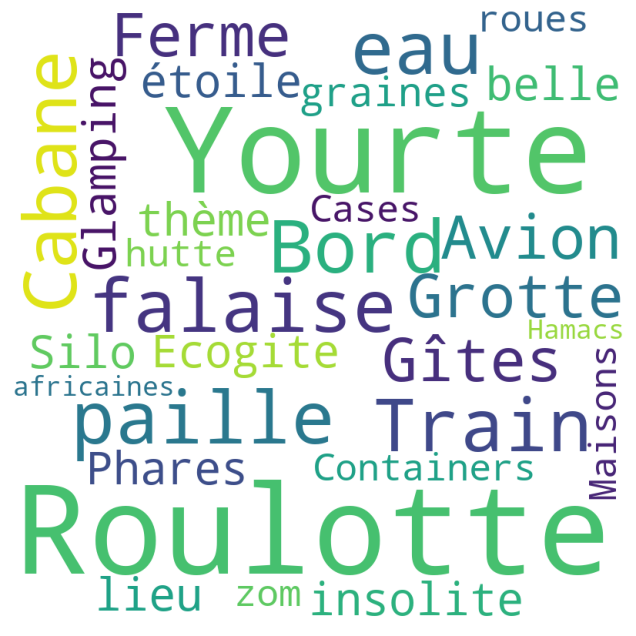

In [140]:
# create a word cloud our of the list of words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(" ".join(words))

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)

# plt.title("Autres logements insolites", fontsize=32)


# hide axis
plt.axis("off")

plt.imshow(wordcloud)

In [141]:
question3_answers = [
    "Aucun",
    "Cabane dans les arbres",
    "Tente ou Tipi",
    "Tonneau",
    "Pods (bulles )",
    "Péniche ou autres types de bateau",
    "Autres types de tiny house",
    "Igloo",
    "Bunker",
]


In [161]:
data_autres = (
    df[cols[3]]
    .apply(remove_part_that_match, list_to_remove=question3_answers)
    .str.replace(",", "")
    .str.strip()
    # show if row is empty
    .str.len()
    .apply(lambda x: "Autres" if x > 0 else None)
).value_counts()

data_autres

Autres    53
Name: Dans quel(s) type(s) de gîte(s) insolite(s) avez-vous déjà séjourné ?, dtype: int64

In [162]:
data_questions_3 = df[cols[3]].apply(keep_all_part_that_match, list_to_remove=question3_answers).explode().value_counts()

data_questions_3 = pd.concat([data_questions_3, data_autres])


fig = px.pie(
    data_questions_3,
    values=data_questions_3.values,
    names=data_questions_3.index,
    title=cols[3],
    width=800,
    height=800,
)


fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [165]:
cols[5]

'Comment aviez-vous entendu parler de ce gîte ?'

In [168]:
question5_answers = [
    "Publicité dans la presse écrite",
    "Bouche à oreille",
    "Plateforme spécialisée (airbnb)",
    "Office du tourisme",
    "Bon-cadeau offert par des amis",
    "Smartbox",
    "Recherche internet"
]

In [172]:
def replace_if_not_in_list(x, list_to_remove):
    if x not in list_to_remove:
        return "Autres"
    return x

In [176]:
data_question5 = (
    df[cols[5]]
    # filter na
    .dropna()
    .apply(replace_if_not_in_list, list_to_remove=question5_answers)
    .value_counts()
)


In [177]:
fig = px.pie(
    data_question5,
    values=data_question5.values,
    names=data_question5.index,
    title=cols[5],
    width=800,
    height=800,
)


fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [181]:
question7_answers = [
    "Ça ne m'intéresse pas",
    "Trop eloigné de mon lieu d'habitation",
    "Je n'aime pas le concept",
    "C'est trop cher"
]

data_question7 = (
    df[cols[7]]
    # filter na
    .dropna()
    .apply(replace_if_not_in_list, list_to_remove=question7_answers)
    .value_counts()
)

fig = px.pie(
    data_question7,
    values=data_question7.values,
    names=data_question7.index,
    title=cols[7],
    width=800,
    height=800,
)


fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [182]:
cols[9]

'Quel confort estimez-vous indispensable pour ce type de gîte ? (Si possible, max 3 options ou moins)'

In [183]:
question9_answers = [
    "Chauffage",
    "Literie fournie (duvets)",
    "Douche",
    "WC normaux",
    'WC "naturels" (sciure)',
    "TV ou beamer",
    "Wi-Fi",
    "Minibar"
]

In [192]:
data_question9 = (
    df[cols[9]]
    .apply(keep_all_part_that_match, list_to_remove=question9_answers)
    .explode()
    .value_counts()
)

data_question_9_autres = (
    df[cols[9]].apply(remove_part_that_match, list_to_remove=question9_answers)
    .str.replace(",", "")
    .str.strip()
    # show if row is empty
    .str.len()
    .apply(lambda x: "Autres" if x > 0 else None)
).value_counts()

data_question_9 = pd.concat([data_question9, data_question_9_autres])


In [195]:
fig = px.pie(
    data_question_9,
    values=data_question_9.values,
    names=data_question_9.index,
    title=cols[9].split(" (")[0],
    width=800,
    height=800,
)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()


In [197]:
cols[14]

"Quels sont les critères qui vous feraient choisir un hébergement parmi d'autres ?"

In [198]:
questions_14_answers = [
    "Proximité d'un arrêt de bus ou d'une gare",
    "Distance depuis votre domicile",
    "Le lieu dans lequel serait situé la cabane dans les arbres",
    "Le prix de la nuitée",
    "La vue depuis la cabane",
    "Le fait que la cabane soit isolée",
    "La recommandation d'un proche",
    "Parking à disposition",
    "Sa réputation en ligne (TripAdvisor et Avis Google)"
]

data_question_14 = (
    df[cols[14]]
    .apply(keep_all_part_that_match, list_to_remove=questions_14_answers)
    .explode()
    .value_counts()
)

data_question_14_autres = (
    df[cols[14]].apply(remove_part_that_match, list_to_remove=questions_14_answers)

    .str.replace(",", "")
    .str.strip()
    # show if row is empty
    .str.len()
    .apply(lambda x: "Autres" if x > 0 else None)
).value_counts()

data_question_14 = pd.concat([data_question_14, data_question_14_autres])

fig = px.pie(
    data_question_14,
    values=data_question_14.values,
    names=data_question_14.index,
    title=cols[14],
    width=800,
    height=800,
)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [199]:
questions_15_answers = [
    "Demande en mariage",
    "Sortie romantique",
    "Nuit de noce",
    "Se rapprocher de la nature",
    "Déconnexion du quotidien / de la routine",
    "Week-end atypique",
    "Essayer quelque chose de nouveau",
    "Anniversaire",
    "Enterrement de vie de jeune fille ou garçon",
    "Sortie d'entreprise",
    "Weekend ou semaine en famille",
    "Ca ne m'intéresse pas"
]

data_question_15 = (
    df[cols[15]]
    .apply(keep_all_part_that_match, list_to_remove=questions_15_answers)
    .explode()
    .value_counts()
)

data_question_15_autres = (
    df[cols[15]].apply(remove_part_that_match, list_to_remove=questions_15_answers)

    .str.replace(",", "")
    .str.strip()
    # show if row is empty
    .str.len()
    .apply(lambda x: "Autres" if x > 0 else None)
).value_counts()

data_question_15 = pd.concat([data_question_15, data_question_15_autres])

fig = px.pie(
    data_question_15,
    values=data_question_15.values,
    names=data_question_15.index,
    title=cols[15],

    width=800,
    height=800,

)

fig.update_traces(textposition='inside')

fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()

In [200]:
questions_16_answers = [
    "Automne",
    "Hiver",
    "Printemps",
    "Eté",
]

data_question_16 = (
    df[cols[16]]
    .apply(keep_all_part_that_match, list_to_remove=questions_16_answers)
    .explode()
    .value_counts()
)

data_question_16_autres = (
    df[cols[16]].apply(remove_part_that_match, list_to_remove=questions_16_answers)

    .str.replace(",", "")

    .str.strip()

    # show if row is empty

    .str.len()

    .apply(lambda x: "Autres" if x > 0 else None)

).value_counts()

data_question_16 = pd.concat([data_question_16, data_question_16_autres])

fig = px.pie(

    data_question_16,

    values=data_question_16.values,

    names=data_question_16.index,

    title=cols[16],

    width=800,

    height=800,

)

fig.update_traces(textposition='inside')

fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# show the plot

fig.show()
